In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [60]:
# matplotlib.rcParams.update({'font.size': 25})

In [112]:

file_name = r"../log_nes_run_1708886709.9512992.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [113]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

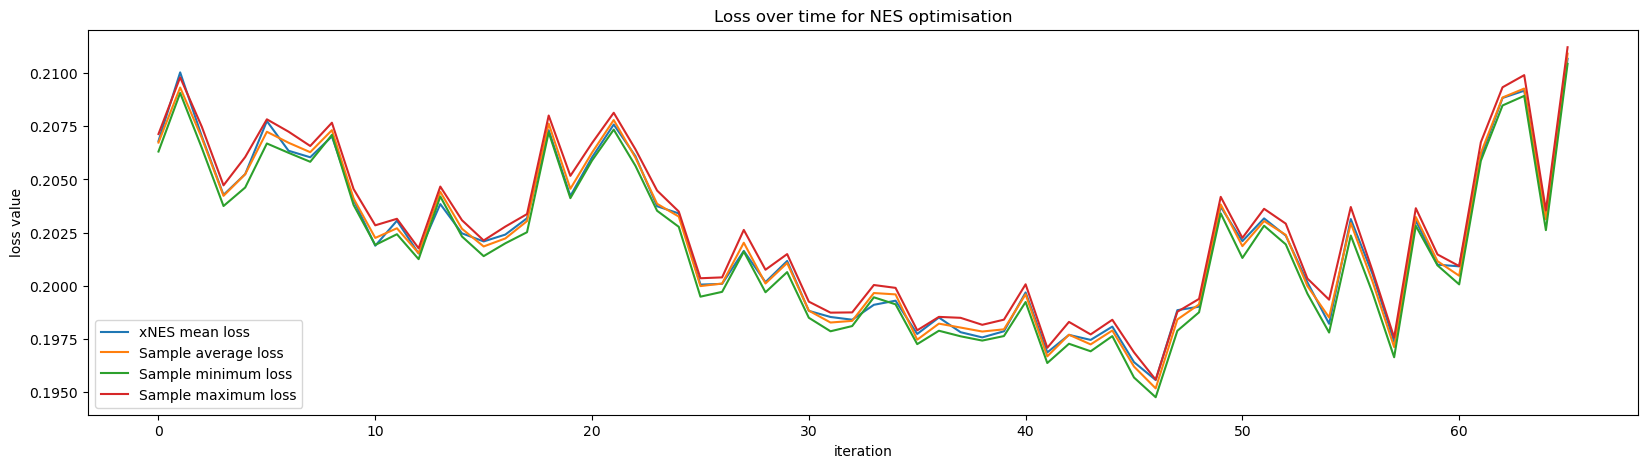

In [114]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

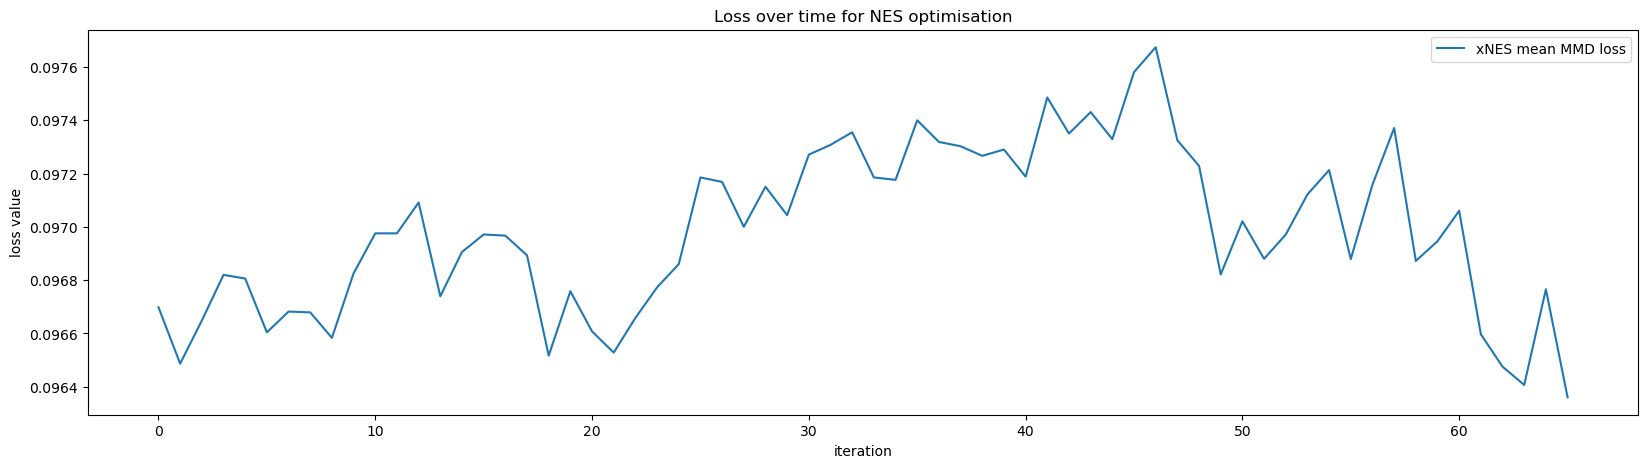

In [115]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

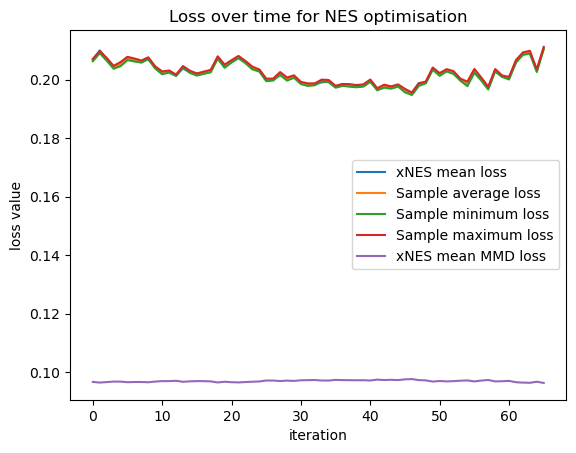

In [116]:
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [117]:
def plot_standing_average(array, show=True):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average)
    if show:
        plt.show()

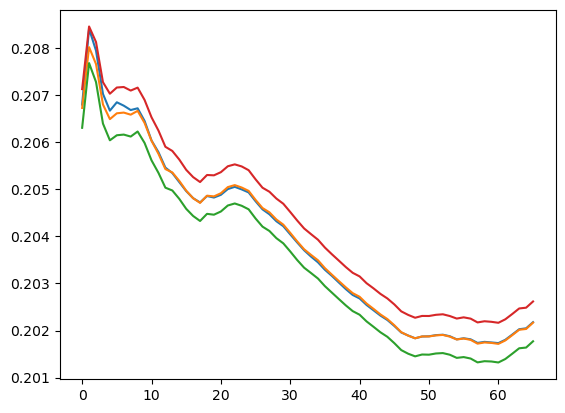

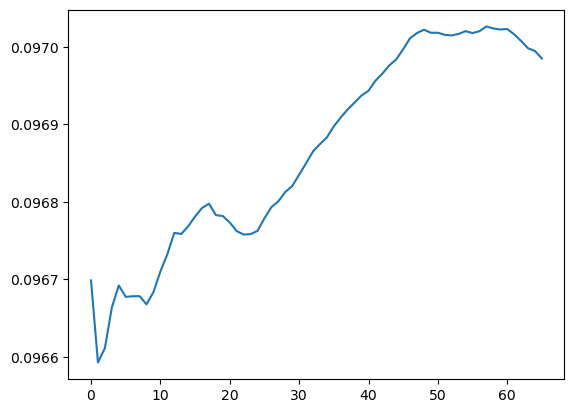

In [118]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["avg"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["min"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["max"].to_numpy().squeeze(), show=False)
plt.show()

plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [119]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.20217733763307644
std: 0.0036886420076088855
max: 0.2106675417145192
min: 0.195577529024466
range: 0.015090012690053195


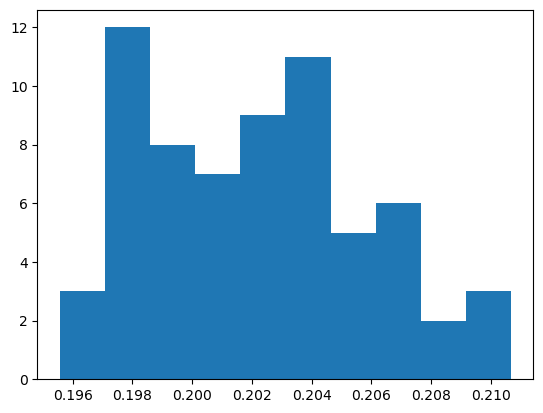

mean: 0.20216766253424653
std: 0.00373951510280155
max: 0.2109109096910282
min: 0.1951837046345631
range: 0.015727205056465077


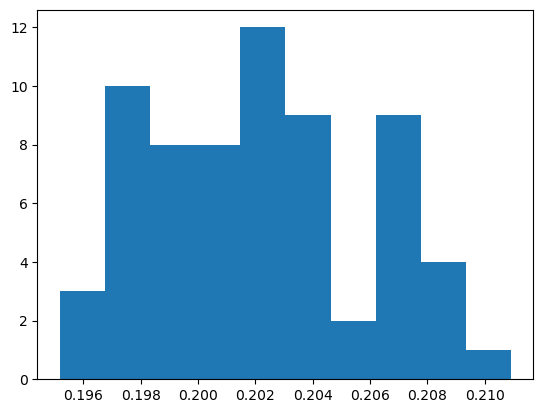

mean: 0.20177094194796996
std: 0.0037355780365686433
max: 0.2104303928385277
min: 0.1947681642275393
range: 0.015662228610988427


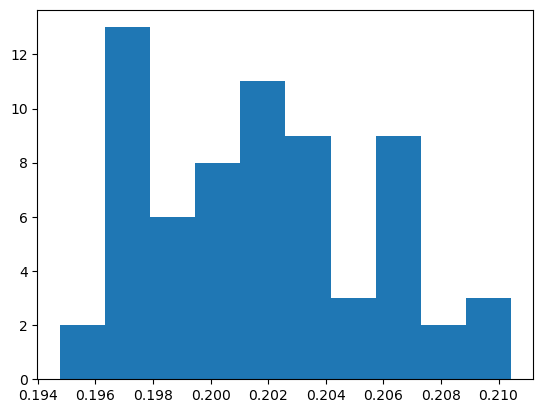

mean: 0.20261763202851954
std: 0.0037444333620992977
max: 0.2112107195796544
min: 0.1955939119586813
range: 0.015616807620973089


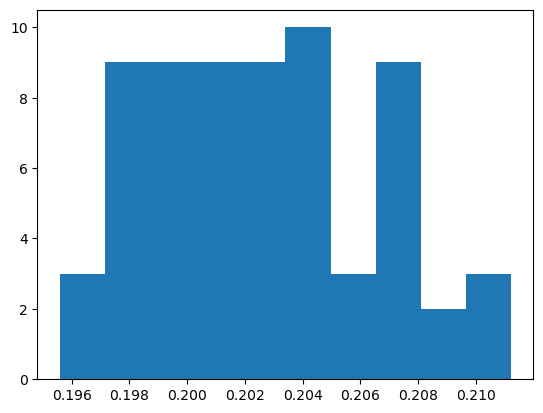

mean: 0.09698497207551898
std: 0.0003067780772639197
max: 0.0976746275538048
min: 0.0963607292294601
range: 0.0013138983243446978


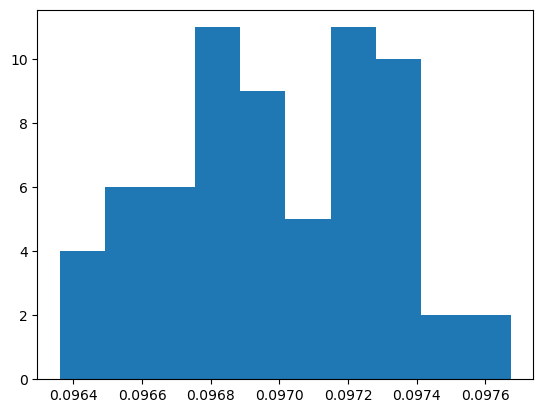

In [120]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg"].to_numpy().squeeze())
print_loss_analysis(loss_df["min"].to_numpy().squeeze())
print_loss_analysis(loss_df["max"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

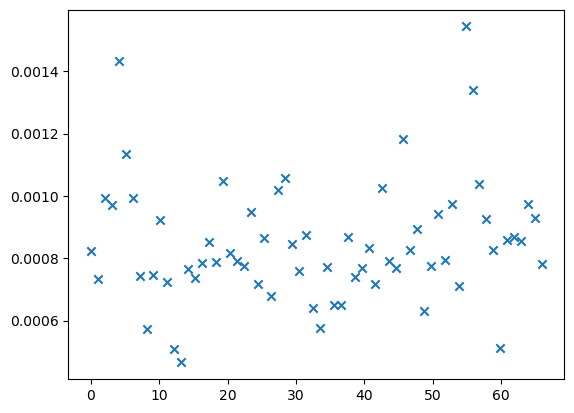

mean: 0.0008466900805496033
std: 0.00019414859242061078
max: 0.0015439440030604878
min: 0.0004654343162353025
range: 0.0010785096868251853


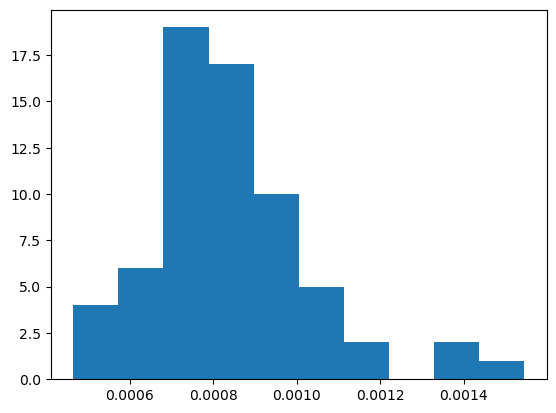

In [121]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())